In [1]:
# This is the directory path to the data-sets
# Update if needed
path = ''

# CT5133 - Deep Learning
## Assignment 1
### March 4, 2019

**Group\:**

David O'Callaghan (ID - 19233706)

Mani Vegupatti Selvanathan (ID -  19232668)

## Part 1 - Implementation of a Feed-Forward Neural Network with Back-Propagation

___
## 1.1 Architecture
### 1.1.1 Perceptron and Feed-Forward Neural Network
A perceptron is the smallest unit of a neural network which is outputs either 0 or 1 based on threshold value using the cumulative sum of weighted input values. Single perceptron can perform logical operations such as AND, OR and NOT except XOR. To achieve XOR operation, we need multiple perceptrons arranged in layers, known as MultiLayer Perceptron (MLP).  Fully connected Feed-Forward Neural Network (FFNN) is the most common form of the MLP.

### 1.1.2 Architecture of a Feed-Forward Neural Network
A simple FFNN consists of 3 layers such as input layer, hidden layer and output layer as shown below [1],
![alt text](https://drive.google.com/uc?id=1b4xdX_TWU1iLfGTY5nfRjbeoaMi2T9OJ)

## 1.2 Algorithm
The aim of the algorithm is to learn the weights for the equation which can best approximate the training data and generalize for the unknown data. The backpropagation algorithm uses feedforward pass and backpropagation pass with gradient descent as optimization method.
### 1.2.1 Feedforward Pass
Feedforward pass computes the hypothesis value of the layer[l+1] using the weighted sum of layer[l] node values as input to non-linear threshold function. The equation [2] is,

$z^{(l+1)}= W^{(l)} x^{(l)} + b^{(l)}$  (or) $z^{(l+1)}= W^{(l)} a^{(l)} + b^{(l)}$ 

$a^{(l+1)}=f(z^{(l+1)})$

where $b$ is the bias, $x$ is the feature matrix, $W$ is Weight matrix, $z$ is the weighted sum of input nodes and $a$ is the output of the activation function.

We can use any non-linear function such as Sigmoid, Re-Lu, and Tanh as activation functions

### 1.2.2 Backpropagation Pass
In the backpropagation pass, we learn the weights incremently in the direction of gradient. This is achieved by minimizing the sum of errors in the output layers and hidden layers. In the output layer, we use the error function as difference between actual and predicted value, whereas in the hidden layer we use the weighted sum of errors from the previous layer nodes for which this node is an input node. The formulas [2] used are as below,

>$W_{j,k} = W_{j,k}+ αa_{j}Δk$

>$Δ_{k}= f'(z_{k}).Err_{k}$

>$W_{i.j} =  W_{i,j} + αa_{i}Δ_{j}$

>$Δ_{j}= f'(z_{j}) . Σ_{k}W_{j,k}Δ_{k}$

### 1.2.2 Backpropagation Algorithm

Step 1: We initialize the weights of all layers using random numbers between -1 to +1. (Note: Don't initialize with all zeros or ones)

Step 2: We carry out the step3 and Step4 for all epoches or till convergence 

Step 3: carry out FeedForward Pass

Step 4: Backpropagation pass 


**Sources:**

[1] Andrew Ng, Jiquan Ngiam, Chuan Yu Foo, Yifan Mai, Caroline Suen, Adam Coates, Andrew Maas, Awni Hannun, Brody Huval, Tao Wang, Sameep Tandon. Url: http://ufldl.stanford.edu/tutorial/. Unsupervised Feature Learning and Deep Learning Tutorial

[2] Madden, M. (2020). CT5133 Deep Learning - Topic 2: From Logistic Regression to Neural Networks


___
### Python Implementation

In [0]:
# Use numpy for low-level math operations
import numpy as np
np.random.seed(42) # Random seed or reproducable results

class NeuralNetwork(object):
    """
    Implementation of a feed-forward neural network with
    back-propagration. The network contains one hidden layer
    and the number of nodes in this layer is configurable.
    """
    def __init__(self, num_hidden_nodes, learning_rate=0.01, tol=1e-4, num_epochs=2, activation='sigmoid'):
        self.num_hidden_nodes = num_hidden_nodes # Number of nodes in the hidden layer
        self.num_output_nodes = 1 # Number of nodes in the output layer
        self.learning_rate = learning_rate # Learning rate for GD (alpha)
        self.tol = tol # Tolerance for GD convergence
        self.num_epochs = num_epochs # Number of epochs for backpropagation
        self.stats = [] # Empty list to store error for plotting
        
        # Handling of activation function
        possible_activations = ['sigmoid']
        if activation in possible_activations:
            self.activation = activation
        else:
            raise ValueError(f'The activation must be in {possible_activations}')          
        
        self.__model_fitted = False # To check if the model has already been trained

    def fit(self, X, y):
        """
        Back Propagation Algorithm
        - Implemented by David
        """
        # Store shape of training data
        self.num_samples_train = X.shape[0]
        self.num_attributes = X.shape[1]
        
        # Only initialise weights if the model is not already fitted
        if self.__model_fitted == False:
            self.initialise_weights()
            self.__model_fitted = True

        prev_err = 100 # Arbitrarily large error
        
        for epoch in range(self.num_epochs):
            # Feed Forward Pass
            self.feed_forward(X)
            
            # Backprop Pass
            # Output Layer
            error_output = y - self.a[1] # Error at output
            delta_output = error_output * self.fprime(self.a[1]) # Multiply by gradient
            weight_update1 = self.learning_rate * np.dot(delta_output, self.a[0].T) # Distribute error
            bias_update1 = self.learning_rate * np.sum(delta_output) # Sum equivalent to dot product with 1's

            # Hidden Layer
            error_hidden = np.dot(self.weights[1].T, delta_output) # 'Error' at hidden layer
            delta_hidden = error_hidden * self.fprime(self.a[0]) # Multiply by gradient
            weight_update0 = self.learning_rate * np.dot(delta_hidden, X) # Distribute error
            bias_update0 = self.learning_rate * np.sum(delta_hidden) # Sum equivalent to dot product with 1's
            
            # Update Weights
            self.weights[1] += weight_update1 # Weights to output layer      
            self.weights[0] += weight_update0 # Weights to hidden layer
            
            # Update Biases
            self.biases[1] += bias_update1 # Biases to ouput layer
            self.biases[0] += bias_update0 # Biases to hidden layer

            # For Monitoring gradient descent
            if (epoch + 1) % 250 == 0:
                err = self.compute_error(y, self.a[-1])
                self.stats.append((epoch, err)) # For plotting
                print(f'Epoch {epoch + 1} : Error = {err}')
                # Check for convergence
                if abs(err - prev_err) <= self.tol:
                    print(f'Convergence met after {epoch} Epochs')
                    break
                prev_err = err # Storing for next check

    def predict_proba(self, X):
        """
        Feed Forward with learned weights
        - Implemented by Mani
        """
        self.feed_forward(X) # Feed X through the network
        
        # Predicted probabilities 'a' at the output layer
        y_prob = self.a[-1].reshape(-1,) # Reshape to 1-D vector

        return y_prob
    
    def feed_forward(self, X):
        """
        Feed the data X through the network
        - Implemented by Mani
        """
        # Hidden Layer
        z_hidden = np.dot(self.weights[0], X.T) + self.biases[0]
        a_hidden = self.f(z_hidden)
        
        # Output Layer
        z_output = np.dot(self.weights[1], a_hidden) + self.biases[1]
        a_output = self.f(z_output)
        
        self.z = [z_hidden, z_output]
        self.a = [a_hidden, a_output] 

    def predict(self, X, threshold=0.5):
        """
        Apply threshold to the output
        - Implemented by Mani
        """
        y_prob = self.predict_proba(X)
        y_pred = np.where(y_prob > threshold, 1, 0)
        return y_pred

    def score(self, X, y):
        """
        Return classification accuracy
        - Implemented by David
        """
        y_pred = self.predict(X)
        return np.sum(y_pred == y) / len(y)

    def initialise_weights(self):
        """
        Initialise the weights in the network to small
        random values.
        - Implemented by David
        """
        # Set all weights and biases to random values between -0.5 and 0.5

        # Weight matrices
        self.weights = [None, None]
        # Weights from layer 1 (input) to layer 2 (hidden)
        self.weights[0] = np.random.rand(self.num_hidden_nodes, self.num_attributes) - 0.5
        # Weights from layer 2 (hidden) to layer 3 (output)
        self.weights[1] = np.random.rand(self.num_output_nodes, self.num_hidden_nodes) - 0.5
        
        # Bias Vectors
        self.biases = [None, None]
        # Biases from layer 1 (input) to layer 2 (hidden)
        self.biases[0] = np.random.rand(self.num_hidden_nodes, 1) - 0.5
        # Biases from layer 2 (hidden) to layer 3 (output)
        self.biases[1] = np.random.rand(self.num_output_nodes, 1) - 0.5

    def f(self, z):
        """
        Activation Function
        - Implemented by David
        """
        if self.activation == 'sigmoid':
            f_z = 1 / ( 1 + np.exp(-z)) # Sigmoid formula
        return f_z

    def fprime(self, a):
        """
        Derivative of Logistic function
        - Implemented by David
        """
        if self.activation == 'sigmoid':
            fprime_z = a * ( 1 - a ) # a is the output of f()
        return fprime_z  

    def compute_error(self, y_train, y_prob):
        """
        Returns the mean absolute error (MAE)
        - Implemented by David
        """
        return np.mean(np.abs(y_train - y_prob)) # MAE

## Part 2 - Testing on a Simple Dataset


Reading in the Data-Set (done by David)

In [0]:
# Import libraries for data-preprocessing and plotting
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
# Read in data
path = "./"
csv_file_path = path + 'circles500.csv' # TODO update before submission
circles_df = pd.read_csv(csv_file_path)
circles_df.head()

,X0,X1,Class
0,0.180647,0.552945,1
1,-0.188674,0.325629,1
2,0.413742,0.931251,0
3,-0.199223,0.902665,0
4,0.488279,-0.341202,1


In [0]:
# Create feature matrix and target vector
X, y = circles_df.iloc[:,:-1].values, circles_df.iloc[:,-1].values

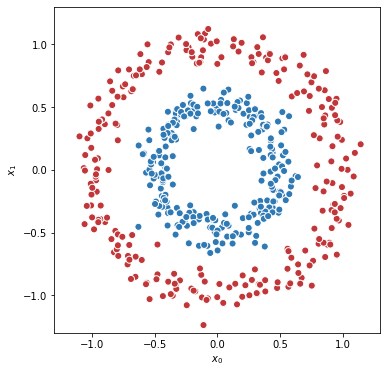

In [0]:
# Scatter plot of data
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1.3, 1.3), ylim=(-1.3, 1.3),
       xlabel="$x_0$", ylabel="$x_1$");

Train the network and test on a separate subset (done by Mani)

In [0]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create a Neural Network and train it on the training set...

In [0]:
# Train Neural Network
clf = NeuralNetwork(num_hidden_nodes=20, learning_rate=0.001, tol=1e-8, num_epochs=10000)
clf.fit(X_train, y_train)

Epoch 250 : Error = 0.49909304755576306
Epoch 500 : Error = 0.4987963673139428
Epoch 750 : Error = 0.4985595189522306
Epoch 1000 : Error = 0.4983607167891773
Epoch 1250 : Error = 0.49818261955369214
Epoch 1500 : Error = 0.4980097010660687
Epoch 1750 : Error = 0.4978261260996485
Epoch 2000 : Error = 0.4976134792020488
Epoch 2250 : Error = 0.49734791280894064
Epoch 2500 : Error = 0.4969963084168825
Epoch 2750 : Error = 0.49651106577368254
Epoch 3000 : Error = 0.4958232990024918
Epoch 3250 : Error = 0.4948346481121202
Epoch 3500 : Error = 0.49340851884237913
Epoch 3750 : Error = 0.49136175969950957
Epoch 4000 : Error = 0.4884567569788401
Epoch 4250 : Error = 0.4843915242051982
Epoch 4500 : Error = 0.47878091815315615
Epoch 4750 : Error = 0.4711150472088694
Epoch 5000 : Error = 0.4606952514497123
Epoch 5250 : Error = 0.44664548616194866
Epoch 5500 : Error = 0.42821149680468934
Epoch 5750 : Error = 0.4053416340440653
Epoch 6000 : Error = 0.37906442805015933
Epoch 6250 : Error = 0.3512466381

Test on held out data...

In [0]:
print(f'Accuracy: {clf.score(X_test, y_test) * 100}%')

Accuracy: 99.33333333333333%


Visualise the decision boundary...

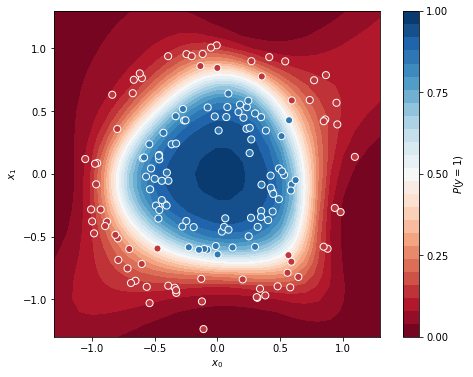

In [0]:
# This code has been adapted from an example plot in CT5132 - Programming and 
# Tools for AI (by Dr. James McDermott)
# Plot decision boundary
g = np.linspace(-5, 5, 101)
xg, yg = np.meshgrid(g, g)
xg = xg.flatten()
yg = yg.flatten()
Xg = np.array([xg, yg]).T

probs = clf.predict_proba(Xg)
probs = probs.reshape(101, 101)

f, ax = plt.subplots(figsize=(8, 6))

# contourf -> contour plot
# RdBu -> Red to Blue colour map
# vmin, vmax -> bounds on probs
contour = ax.contourf(g, g, probs, 25, cmap="RdBu", vmin=0, vmax=1)

# colorbar -> legend
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# s -> marker size
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-1.3, 1.3), ylim=(-1.3, 1.3),
       xlabel="$x_0$", ylabel="$x_1$");

### Observations on testing

The Feed Forward Neural Network with a single hidden layer of 20 nodes was trained on a random split of 70% of the data for 10,000 epochs with a learning rate of 0.001. The data was tested on the remaining 30% of the data (i.e., the test data) and achieved a prediction accuracy of 99.33%. This is almost perfect performance on this simple data-set as the network only mis-classified 1 unseen test sample.

From the visualisation of the decision boundary above, the ability of the network to form a non-linear hypothesis is clear. A network with fewer hidden units or one that was trained on a smaller number of epochs could not model circular pattern seen in the plot sufficiently. A higher learning rate would cause the gradient descent to fail to converge on the error.

## Part 3 - Testing on a Challenging Dataset
The group was tasked with distinguishing between the **Ship** and **Frog** classes in the CIFAR-10 image dataset.

In [0]:
# Source: https://www.cs.toronto.edu/~kriz/cifar.html [Date Accessed: 10 February 2020]
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# Source: CT5133 Materials: LoadCIFAR10.ipynb provided with the assignment
def loadbatch(batchname):
    folder = path + 'cifar-10-batches-py' # TODO : Update before submission
    batch = unpickle(folder+"/"+batchname)
    return batch

def loadlabelnames():
    folder = path + 'cifar-10-batches-py' # TODO : Update before submission
    meta = unpickle(folder+"/"+'batches.meta')
    return meta[b'label_names']

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

### Data pre-processing (done by Mani)

For this more complex data-set, only `data_batch_1` was considered. A single batch contains 10,000 images of 10 different classes. Below, a subset of the images that are of class Ship or Frog is created, resulting in a set of 2055 relevent images. These images are converted from RGB to greyscale before training and testing so that only 1 dimension for each pixel needed to be considered. The data is also normalised to be put on a scale between 0 and 1.

In [0]:
labels = [b'ship', b'frog']
n_batches = 5
names = loadlabelnames()

def rgb2gray(batch_num):
    batch_name = 'data_batch_' + str(batch_num)
    batch = loadbatch(batch_name)

    # Get data and targets
    X = batch[b'data']
    y = np.array(batch[b'labels'])

    # Filter only ship and frog
    indices = np.bitwise_or(y == names.index(b'ship'), y == names.index(b'frog'))
    
    # Create Feature Matrix
    X = X[indices]
    n_samples = X.shape[0]
    
    # Reshape X to multiply with RGB to grey conversation constants array
    X.shape = (n_samples,3,32,32) 
    r, g, b = np.asarray(.3, dtype='float32'), np.asarray(.59, dtype='float32'), np.asarray(.11, dtype='float32')
    # Grey scale data
    grey = (r*X[:,0,:,:] + g*X[:,1,:,:] + b*X[:,2,:,:])
    
    # Convert to 2D array for input to NN
    grey_2d = np.copy(grey)
    grey_2d.shape = (n_samples,1024)
    
    # Create binary target Vector
    y = y[indices]
    y = np.where(y == names.index(b'ship'), 1, 0) # ship is 1, frog is 0
    
    return grey_2d, y

X, y = rgb2gray(batch_num=1)

In [0]:
# Train test split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

### Train the network and test on a separate subset (done by David)

Below, the NeuralNetwork class is instantiated with hidden layer of 256 nodes. The network is trained on the training set (greyscale and normalised) with a learning rate of 0.001 for 10,000 epochs. Note that the Mean Absolute Error is printed out for each epoch.

In [0]:
# Train Neural Network
nn = NeuralNetwork(num_hidden_nodes=256, learning_rate=0.001, tol=1e-13, num_epochs=10000)
nn.fit(X_train_norm, y_train)

Epoch 250 : Error = 0.4229190470721556
Epoch 500 : Error = 0.3830981316711682
Epoch 750 : Error = 0.3635630557844033
Epoch 1000 : Error = 0.35240925898397196
Epoch 1250 : Error = 0.34494568026662437
Epoch 1500 : Error = 0.33936460132843177
Epoch 1750 : Error = 0.3348742966058518
Epoch 2000 : Error = 0.3310840776880023
Epoch 2250 : Error = 0.32778117056020106
Epoch 2500 : Error = 0.32483903002799125
Epoch 2750 : Error = 0.3221763682652743
Epoch 3000 : Error = 0.31973772332438655
Epoch 3250 : Error = 0.31748360911415097
Epoch 3500 : Error = 0.3153850607916547
Epoch 3750 : Error = 0.31342030749128463
Epoch 4000 : Error = 0.3115725809668294
Epoch 4250 : Error = 0.3098286113867528
Epoch 4500 : Error = 0.30817758366451425
Epoch 4750 : Error = 0.3066104189348274
Epoch 5000 : Error = 0.3051192878573326
Epoch 5250 : Error = 0.30369728697654114
Epoch 5500 : Error = 0.3023382269859751
Epoch 5750 : Error = 0.30103649547911643
Epoch 6000 : Error = 0.2997869675123153
Epoch 6250 : Error = 0.298584945

Check the performance on the unseen test set:

In [0]:
print(f'Accuracy: {nn.score(X_test_norm, y_test) * 100}%')

Accuracy: 79.07542579075427%


Create a confusion matrix for further insight on the performance:

In [0]:
def make_confusion_matrix(y_pred, y_test, classes=("Frog", "Ship")):
    """
    Plots a confusion matrix as a heatmap.
    
    This code was adapted from the following source:
    https://datatofish.com/confusion-matrix-python/ [Accessed: 24/02/2020]
    """
    import seaborn as sns
    y_test_ = np.where(y_test==1, classes[1], classes[0])
    y_pred_ = np.where(y_pred==1, classes[1], classes[0])
    data = {'y_Actual':    y_test_,
            'y_Predicted': y_pred_
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    # https://seaborn.pydata.org/tutorial/color_palettes.html
    cmap = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

    ax = sns.heatmap(confusion_matrix, annot=True, cmap=cmap, fmt='g', cbar=True);
    ax.set_title("Confusion Matrix")
    ax.set(aspect="equal")
    plt.show()

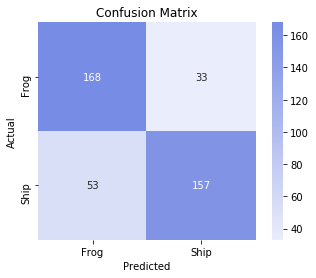

In [0]:
y_pred = nn.predict(X_test_norm)
make_confusion_matrix(y_pred, y_test)

### Observations on Testing
**Data Preprocessing:** The input data to the model plays a huge role in achieving the final accuracy. We tried below steps,


>>1.   Single Color Vs Greyscale image: The input data with conversion to greyscale performs better than the single colour.
>>2.   Non-normalized Vs Normalized data: We had convergence issues in the non-normalized data where errors were fluctuating and for the normalized data we rarely had the fluctuation and it helped in convergence.

**Number of Nodes:** We have tried with multiples "number of nodes" and found that the "number of nodes" affects the accuracy and training speed. With various runs, we found that $256$ nodes perform best for this dataset.

**Learning Rate:** With learning rate 0.01 the gradient descent unable to find the minima, whereas with 0.0001 it was learning very slow and $0.001$ was the optimal learning rate for this task.

**Epoches:** We noticed that "$10,000$ epochs" is the suitable choice and above which it doesn't contribute to the increase in accuracy in the test data set.

**Confusion Matrix:** We found that the model performs better in detecting frogs when compared to ships


## Part 4 - Deep Learning
### 4.1 Enhancement - Adding more hidden layers (David O'Callaghan)
___
#### Description of Enhancment

A deep neural network can be created by adding more hidden layers and more hidden nodes to each layer of the implementation used thus far. Such a network can represent functions of a higher complexity compared to 'shallow' networks (Goodfellow, 2016). A caveat, however, is that deeper networks take longer to train and using back-propagation can lead to vanishing gradient problem.

The feed forward neural network with a single hidden layer was sufficient for accurately classifying the samples in the _circles500_ data-set. However, the best accuracy that could be achieved in the binary classification task for images from the _CIFAR-10_ data-set was only 79%. A deep neural network could potentially close this gap.

To implement this enhancement, the feed-forward and back-propagation algorithms needed to be extended to work for a higher number of hidden layers. In the single hidden layer implementation, the feed forward and back propagation contained _hard-coded_ calculations for each layer in the network. To make a more flexible implementation that could have a variable number of hidden layers, the formulae (Madden, 2020) presented in Part 1 above needed to be re-implemented in general form so that the layers could be looped through.

**Sources:**

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

Madden, M. (2020). CT5133 Deep Learning - Topic 2: From Logistic Regression to Neural Networks
___
#### Implementation of Enhancement

In [0]:
class DeepNeuralNetwork(NeuralNetwork):
    """
    Implementation of a feed-forward neural network with
    back-propagration. The network can contain multiple hidden layers
    and the number of nodes in each layer is configurable.
    """
    def __init__(self, hidden_layer_sizes=(10,10), learning_rate=0.01, tol=1e-4, num_epochs=2, activation='sigmoid'):
        self.hidden_layer_sizes = hidden_layer_sizes # Tuple of number of hidden units in each hidden layer
        self.num_output_nodes = 1 # Number of nodes in the output layer
        self.learning_rate = learning_rate # Learning rate for GD (alpha)
        self.tol = tol # Tolerance for GD convergence
        self.num_epochs = num_epochs # Number of epochs for backpropagation
        self.stats = [] # Empty list to store error for plotting
        
        # Handling of activation function
        possible_activations = ['sigmoid']
        if activation in possible_activations:
            self.activation = activation
        else:
            raise ValueError(f'The activation must be in {possible_activations}') 
        
        self.__num_hidden_layers = len(hidden_layer_sizes) # Number of hidden layers
        self.__num_layers = self.__num_hidden_layers + 2 # Number of layers
        self.__model_fitted = False # To check if the model has already been trained

    def fit(self, X, y):
        """
        Back Propagation Algorithm
        """
        # Store shape of training data
        self.num_samples_train = X.shape[0]
        self.num_attributes = X.shape[1]
        
        # Only initialise weights if the model is not already fitted
        if self.__model_fitted == False:
            self.initialise_weights()
            self.__model_fitted = True

        prev_err = 100 # Arbitrarily large error
        
        # Initialise vectors for updating weights
        weight_updates = [0] * (self.__num_hidden_layers + 1)
        bias_updates = [0] * (self.__num_hidden_layers + 1)
        
        for epoch in range(self.num_epochs):
            # Feed Forward Pass
            self.feed_forward(X)
            
            # Backprop Pass
            error = y - self.a[-1] # Error on output
            for i in range(1, self.__num_layers): 
                delta = error * self.fprime(self.a[-i]) # Multiply by gradient
                weight_updates[-i] = self.learning_rate * np.dot(delta, self.a[-(i+1)].T) # Distribute error
                bias_updates[-i] = self.learning_rate * np.sum(delta)
                error = np.dot(self.weights[-i].T, delta) # Error for next iteration
            
            # Update weights and biases in each layer
            for k in range(self.__num_hidden_layers + 1):
                self.weights[k] += weight_updates[k]
                self.biases[k] += bias_updates[k]
            
            # For Monitoring gradient descent
            if (epoch + 1) % 250 == 0:
                err = self.compute_error(y, self.a[-1])
                self.stats.append((epoch, err)) # For plotting
                print(f'Epoch {epoch + 1} : Error = {err}')
                # Check for convergence
                if abs(err - prev_err) <= self.tol:
                    print(f'Convergence met after {epoch} Epochs')
                    break
                prev_err = err # Storing for next check
    
    def feed_forward(self, X):
        
        self.a = [None] * self.__num_layers
        self.a[0] = X.T # Need to transpose for input layer
        
        # Iterate through layers 
        for i in range(1, self.__num_layers):
            # Compute W.A + b for layer i
            z = np.dot(self.weights[i-1], self.a[i-1]) + self.biases[i-1]
            # Apply activation function
            self.a[i] = self.f(z) 

    def initialise_weights(self):
        """
        Initialise the weights in the network to small
        random values.
        """
        # Set of weights and biases to and from each hidden layer
        self.weights = [None] * (self.__num_hidden_layers + 1)
        self.biases = [None] * (self.__num_hidden_layers + 1)
        
        # Tuple with size of each layer
        layer_sizes = (self.num_attributes, *self.hidden_layer_sizes, self.num_output_nodes)
        
        # Initialise each set of weights and biases to random values in the range [-0.5, 0.5]
        for i in range(self.__num_hidden_layers + 1):
            # Weight matrix shape: rows = next layer size, cols = current layer size
            self.weights[i] = np.random.rand(layer_sizes[i+1], layer_sizes[i]) - 0.5
            # Bias vector shape: rows = next layer size, cols = 1
            self.biases[i] = np.random.rand(layer_sizes[i+1], 1) - 0.5


In [0]:
dnn = DeepNeuralNetwork(hidden_layer_sizes=(256, 64), learning_rate=0.001, tol=1e-8, num_epochs=10000)
dnn.fit(X_train_norm, y_train)

Epoch 250 : Error = 0.4693271171169897
Epoch 500 : Error = 0.41261825246246303
Epoch 750 : Error = 0.37432193580146095
Epoch 1000 : Error = 0.3557024440024768
Epoch 1250 : Error = 0.3455675071371803
Epoch 1500 : Error = 0.3387824390234516
Epoch 1750 : Error = 0.3335743625742463
Epoch 2000 : Error = 0.32926090880784914
Epoch 2250 : Error = 0.32553231129233573
Epoch 2500 : Error = 0.3222251741142581
Epoch 2750 : Error = 0.3192413110637364
Epoch 3000 : Error = 0.31651553133430205
Epoch 3250 : Error = 0.3140015049190365
Epoch 3500 : Error = 0.3116645834236512
Epoch 3750 : Error = 0.3094775553243389
Epoch 4000 : Error = 0.3074178943900941
Epoch 4250 : Error = 0.3054659050753926
Epoch 4500 : Error = 0.3036034250807435
Epoch 4750 : Error = 0.30181284732812336
Epoch 5000 : Error = 0.3000763089408892
Epoch 5250 : Error = 0.2983749958638431
Epoch 5500 : Error = 0.29668861467768554
Epoch 5750 : Error = 0.29499509736142493
Epoch 6000 : Error = 0.29327038097584845
Epoch 6250 : Error = 0.29148796291

Results on Test Data
---------------------
Accuracy: 	79.80000000000001%
Precision: 	87.1%
Recall: 	71.0%
F1-Score: 	78.2%



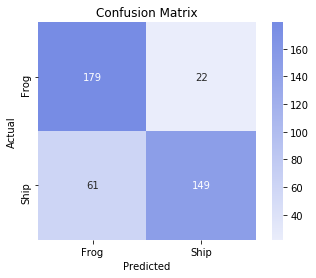

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = dnn.predict(X_test_norm) # Store prediction on test data
acc = dnn.score(X_test_norm, y_test) # Accuracy
pre = precision_score(y_test, y_pred) # Precision
rec = recall_score(y_test, y_pred) # Recall
f1 = f1_score(y_test, y_pred) # F1-score

# Print metrics
print('Results on Test Data\n---------------------')
print(f'Accuracy: \t{100* round(acc, 3)}%')
print(f'Precision: \t{100* round(pre, 3)}%')
print(f'Recall: \t{100* round(rec, 3)}%')
print(f'F1-Score: \t{100* round(f1, 3)}%\n')

# Display Confusion Matrix
make_confusion_matrix(y_pred, y_test)

Compare error curves ...

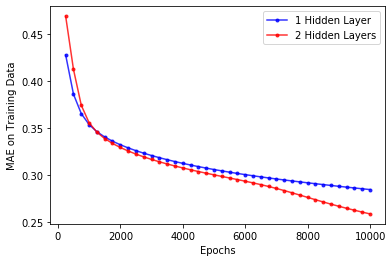

In [0]:
stats_nn = np.array(nn.stats)
stats_dnn = np.array(dnn.stats)
plt.plot(stats_nn[:,0], stats_nn[:,1], 'b.-', alpha=0.8)
plt.plot(stats_dnn[:,0], stats_dnn[:,1], 'r.-', alpha=0.8)
plt.xlabel('Epochs')
plt.ylabel('MAE on Training Data')
plt.legend(['1 Hidden Layer', '2 Hidden Layers'])
plt.show()

___
#### Observations

Although the implementation for this enhancment allows for a neural network any number of hidden layers to be built, only two hidden layers were used in the testing. The reason for this is that with more hidden layers, the training time became too long. Even with two hidden layers, the 'deep' neural network took much longer to train than the single layer initial implementation.

The size of the 1st hidden layer in the network was set to the same as the hidden layer in the single hidden layer implementation ($256$). Since this was a quarter of the size of the input layer, the same factor was applied again to select the size of the 2nd hidden layer ($256/4 = 64$). This network was trained and tested on the same data as before and marginally better results were obtained. An improvement in accuracy of $0.7\%$ on the unseen test data was achieved, giving a total accuracy of $79.8\%$. When comparing the confusion matrices for the 2 models, it can be seen that the enhanced model performs better at classifying Frog images but does not perform as well at classifying Ship images.

The plot above of the Mean Absolute Error (MAE) on the training data across the epochs shows the enhanced model surpassing the single hidden layer network in performance after about 1,000 epochs. The enhanced model appears to still be improving its MAE at a relatively quick rate after 10,000 epochs so perhaps it could have been trained for longer. However, no feature was implemented to prevent over-fitting (such as regularisation or mini-batch training) so the number of epochs was not increased any further.

### 4.2 Enhancement - Mini-batch Gradient Descent (Mani Vegupatti Selvanathan)
___
#### Description of Enhancement:

The few most used methods for updating the weights using gradient descent (andrew) are,


1.   Stochastic Gradient Descent (SGD): Randomly pick one sample for the gradient calculation and updating weights.
2.   Batch Gradient Descent (BGD): Use all data-points of the batch for computation and update weights at end of the iteration 
3.   Mini-batch Gradient Descent (MBGD): This is mid-way between SGD and BGD. Instead of using full-gradient like BGD or single-data-point-gradient like SGD for optimizing weight, this method uses a batch of small size for gradient computation.

#### Algorithm:
- Iterate for all epochs or until convergence 
>- Shuffle the training samples
>- loop for sample size with increment step using mini-batch size
>>- Select the slices of samples (mini-batch) from the desired location in training  dataset using the mini-batch size and iteration number
>>- Calculate gradient and update weights using forward pass and backpropagation using mini-batch

#### How it works and tricks for implementation:
BGD is computationally costly and converges slowly, whereas SGD is quicker in computation, helps to avoid local minima since it calculates gradient using noisy gradient surface (nic) and converges fast though not guaranteed.

Mini-batch smoothens the noise using suitable batch-size. Hence, the batch-size should be small enough to jump-off the local minima and large enough to reduce noise and reach global minima. 

Mini-batch is used by many NN, because of less computational overhead owing to the smaller matrix size and converges  faster. 

Another trick in optimizing the learning in mini-batch is adjusting the learning rates (Hinton) as per the error.

**Sources:**

Andrew Ng, Younes Bensouda Mourri. Url: https://web.stanford.edu/class/cs129/. CS129: Applied Machine Learning

Nic Schraudolph and Fred Cummins. Url: https://cnl.salk.edu/~schraudo/teach/NNcourse/. Introduction to Neural Networks

Geoffrey E. Hinton. Url. http://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6a.mp4. Lecture 6 Overview of mini batch gradient descent


___
#### Implementation of Enhancement

In [0]:
import copy
from sklearn.utils import shuffle
class NeuralNetworkMBGD(NeuralNetwork):
    """
    Implementation of a feed-forward neural network with
    back-propagration using mini-batch gradient descent
    """
    def __init__(self, num_hidden_nodes, learning_rate=0.01, tol=1e-4, num_epochs=2, activation='sigmoid', mini_batch_size=128, adj_lrr=False):
        self.num_hidden_nodes = num_hidden_nodes # Number of nodes in the hidden layer
        self.num_output_nodes = 1 # Number of nodes in the output layer
        self.learning_rate = learning_rate # Current Learning rate for GD (alpha)
        self.learning_rate_init = learning_rate # Original learning rate provided by user
        self.tol = tol # Tolerance for GD convergence
        self.num_epochs = num_epochs # Number of epochs for backpropagation
        self.stats = [] # Empty list to store train-error for plotting
        self.test_stats = [] # Empty list to store test-error for plotting
        self.adj_lrr = adj_lrr # Boolean variable to control learning rate adjustemnt
        self.mini_batch_size = mini_batch_size # Set mini-batch size
        self.models = {} # Empty dictionary to store the models 
        
        # Handling of activation function
        possible_activations = ['sigmoid']
        if activation in possible_activations:
            self.activation = activation
        else:
            raise ValueError(f'The activation must be in {possible_activations}')          
        
        self.__model_fitted = False # To check if the model has already been trained

    def fit(self, X_train, y_train, X_test, y_test):
        
        # Store shape of mini-batch for internal node/structure creation
        self.num_samples_train = self.mini_batch_size #X.shape[0]
        self.num_attributes = X_train.shape[1]#X.shape[1]
        
        # Only initialise weights if the model is not already fitted
        if self.__model_fitted == False:
            self.initialise_weights()
            self.__model_fitted = True

        prev_err = 100 # Arbitrarily large error
        
        for epoch in range(self.num_epochs):
            #Shuffle the samples. Selection with replacemnt
            X_train, y_train = shuffle(X_train, y_train)
            #Calculate gradient and update weights using mini-batch
            for i in range(0, X_train.shape[0], self.mini_batch_size):
                X = X_train[i:i + self.mini_batch_size]
                y = y_train[i:i + self.mini_batch_size]
                # Feed Forward Pass
                self.feed_forward(X)

                # Backprop Pass
                # Output Layer
                error_output = y - self.a[1] # Error at output
                delta_output = error_output * self.fprime(self.a[1]) # Multiply by gradient
                weight_update1 = self.learning_rate * np.dot(delta_output, self.a[0].T) # Distribute error
                bias_update1 = self.learning_rate * np.sum(delta_output) # Sum equivalent to dot product with 1's

                # Hidden Layer
                error_hidden = np.dot(self.weights[1].T, delta_output) # 'Error' at hidden layer
                delta_hidden = error_hidden * self.fprime(self.a[0]) # Multiply by gradient
                weight_update0 = self.learning_rate * np.dot(delta_hidden, X) # Distribute error
                bias_update0 = self.learning_rate * np.sum(delta_hidden) # Sum equivalent to dot product with 1's

                # Update Weights
                self.weights[1] += weight_update1 # Weights to output layer      
                self.weights[0] += weight_update0 # Weights to hidden layer

                # Update Biases
                self.biases[1] += bias_update1 # Biases to ouput layer
                self.biases[0] += bias_update0 # Biases to hidden layer

            # For Monitoring gradient descent
            if (epoch + 1) % 250 == 0:

                #Create model and check error using all samples of Train and Test
                model = NeuralNetworkMBGD(num_hidden_nodes=256, learning_rate=0.001, tol=1e-13, num_epochs=2500)
                self.models[epoch+1] = copy.deepcopy(self.store_model(model))
                err = model.calc_error(X_train, y_train)
                test_err = model.calc_error(X_test, y_test)

                self.stats.append((epoch, err)) # For plotting
                self.test_stats.append((epoch, test_err)) 
                print(f'Epoch {epoch + 1} : Train Error = {err} : Test Error = {test_err} : Learning rate = {self.learning_rate}')
                
                # Check for convergence
                if abs(err - prev_err) <= self.tol:
                    print(f'Convergence met after {epoch} Epochs')
                    break
                prev_err = err # Storing for next check
                
                #Change Learning rate based on error
                if self.adj_lrr == True:
                    if err < 0.33:
                        self.learning_rate = self.learning_rate_init / 2
                    elif err < 0.29:
                        self.learning_rate = self.learning_rate_init / 4
                    else:
                        self.learning_rate = self.learning_rate_init

    def store_model(self, model):
        model.weights = self.weights.copy()
        model.biases = self.biases.copy()
        return model

    def calc_error(self,x_train, y_train):
        prob = self.predict_proba(x_train)
        error = self.compute_error(y_train, prob) 
        return error

In [0]:
nn_mbgd = NeuralNetworkMBGD(num_hidden_nodes=256, learning_rate=0.01, tol=1e-13, num_epochs=2500)

In [0]:
nn_mbgd.fit(X_train_norm, y_train, X_test_norm, y_test)

Epoch 250 : Train Error = 0.32603255842673295 : Test Error = 0.308077795658461 : Learning rate = 0.01
Epoch 500 : Train Error = 0.3092544610154687 : Test Error = 0.2954576484905404 : Learning rate = 0.01
Epoch 750 : Train Error = 0.2917519618825568 : Test Error = 0.2879791364680277 : Learning rate = 0.01
Epoch 1000 : Train Error = 0.28401690513364514 : Test Error = 0.2879375388799839 : Learning rate = 0.01
Epoch 1250 : Train Error = 0.2734510927785956 : Test Error = 0.2829216523791002 : Learning rate = 0.01
Epoch 1500 : Train Error = 0.2650538806635532 : Test Error = 0.28244966627641416 : Learning rate = 0.01
Epoch 1750 : Train Error = 0.2563931163688576 : Test Error = 0.28136320395219283 : Learning rate = 0.01
Epoch 2000 : Train Error = 0.2505884652153705 : Test Error = 0.2820255034154789 : Learning rate = 0.01
Epoch 2250 : Train Error = 0.23829185044756263 : Test Error = 0.27774136374000735 : Learning rate = 0.01
Epoch 2500 : Train Error = 0.22673257567485317 : Test Error = 0.2727577

MBGD Accuracy in Test data: 79.80535279805353%


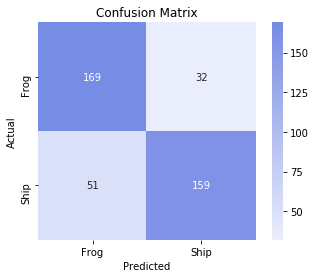

In [0]:
print(f'MBGD Accuracy in Test data: {nn_mbgd.score(X_test_norm, y_test) * 100}%')
y_pred = nn_mbgd.predict(X_test_norm)
make_confusion_matrix(y_pred, y_test)

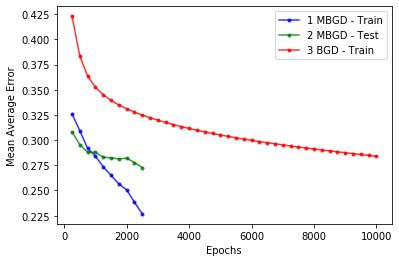

In [0]:
#print error curve for nn, nn_mbgd(train and test)
train_stats = np.array(nn_mbgd.stats)
test_stats = np.array(nn_mbgd.test_stats)
nn_stats = np.array(nn.stats)
plt.plot(train_stats[:,0], train_stats[:,1], 'b.-', alpha=0.8)
plt.plot(test_stats[:,0], test_stats[:,1],'g.-', alpha=0.8)
plt.plot(nn_stats[:,0], nn_stats[:,1], 'r.-', alpha=0.8)
plt.xlabel('Epochs')
plt.ylabel('Mean Average Error')
plt.legend(['1 MBGD - Train', '2 MBGD - Test', '3 BGD - Train'])
plt.show()


___
### Observations
#### Parameters

- **Batch Size:** We tried multiple batch sizes to match the CPU arcitecture (32, 64, 128 and 256) and found it has an impact on the convergence speed. Papers suggest ideal size as 32(bengio) or 128(liang). For this dataset, the mini-batch size $128$ converges faster and allows us to have the learning rate 0.01.

- **Learning Rate:** (hinton) suggested that decaying the learning rate improves convergence by reducing weight oscillations.  We used LR as another parameter and found that it provides marginal improvements at end of the cycle. However, the final test run we did without decaying of learning rate.

#### Others

- **Shuffle:** This paper (bengio) suggests shuffling and allowing randomness  in the selection of samples facilitates fast convergence. We tried testing with and without shuffle and observed with shuffle converges 2-3 times faster than without shuffle

- **Convergence Speed:** The speed is convergence is much faster than the Batch Gradient Descent. It converges in $1000$ epochs to the same accuracy of BGD, which takes $10000$ epochs. The improvement in speed is $90\%$ as shown the above plot for the error of $0.28$

- **Accuracy:** At the end of $2500$ epochs this provides an accuracy of $79.80\%$ as against $79.07\%$ of BGD with $10000$ epoches.

- **Confusion Matrix:** From the confusion matrix, we observed that the model makes more error in predicting the actual label Ship compared to label Frog

- **Overfitting:** We also plotted the error curve for both train and test data and observed the overfitting. We found that after 1000 epochs, the decrease in error is much slower in test data when compared to train data, but it decreases nominally.

**Sources:**

Bengio, Yoshua. Book: Neural networks: Tricks of the trade, Springer. Practical recommendations for gradient-based training of deep architectures

Yingyu Liang. Url: https://www.cs.princeton.edu/courses/archive/spring16/cos495/. COS 495-Introduction to Deep Learning

Geoffrey E. Hinton. Url. http://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6a.mp4. Lecture 6 Overview of mini batch gradient descent
___
